In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

In [186]:
spotify_nodes = pd.read_csv('/Users/nooshy/Downloads/archive (7)/nodes.csv')
spotify_edges = pd.read_csv('/Users/nooshy/Downloads/archive (7)/edges.csv')

spotify_nodes.head()
spotify_edges.head()

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0


In [74]:
#Data cleaning: Rename edges dataframe col names to make more clear
spotify_edges.columns = ['artist_source', 'artist_target']

#Remove whitespace
spotify_nodes.columns = spotify_nodes.columns.str.strip()
spotify_edges.columns = spotify_edges.columns.str.strip()

#Drop any nas
spotify_nodes = spotify_nodes.dropna(subset = ['spotify_id', 'name'])
spotify_edges = spotify_edges.dropna()

spotify_edges.head()

,artist_source,artist_target
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0


In [87]:
# Add nodes from the nodes DataFrame
for index, row in spotify_nodes.iterrows():
    G.add_node(row['spotify_id'], name = row['name'])

# Add edges from the edges DataFrame
for index, row in spotify_edges.iterrows():
    G.add_edge(row['artist_source'], row['artist_target'])

id_to_name = spotify_nodes.set_index('spotify_id')['name'].to_dict()


# Update the graph with artist names as node labels
for node in G.nodes():
    if node in id_to_name:
        G.nodes[node]['label'] = id_to_name[node]  # Add artist_name as the label
    else:
        G.nodes[node]['label'] = str(node)  # Fallback to spotify_id if no name is found

In [88]:
#Find the degree of each node

artist_degree = G.degree()
print(list(artist_degree)[:5])

[('48WvrUGoijadXXCsGocwM4', 1), ('4lDiJcOJ2GLCK6p9q5BgfK', 5), ('652XIvIBNGg3C0KIGEJWit', 0), ('3dXC1YPbnQPsfHPVkm1ipj', 4), ('74terC9ol9zMo8rfzhSOiG', 1)]


In [89]:
#Sort and print nodes based on their degree; showing highest degrees to lowest

sorted_artists = sorted(artist_degree, key = lambda x: x[1], reverse = True)

for id, degree in sorted_artists[:10]:
    print((id), (degree))

5aIqB5nVVvmFsvSdExz408 110
1U5zgr455OGyIkLNXvDdrf 106
0f1IECbrVV952unZkzrsg2 63
0SfsnGyD8FpIN4U4WCkBZ5 48
7jzR5qj8vFnSu5JHaXgFEr 48
4hV3aU0WKvFaiX5ugXP5hp 44
3l4fsEzoeabsET7ddv0lZW 42
6ugw7JCu0AG7txRcRAxU8d 41
1mYsTxnqsietFxj1OgoGbG 35
13y7CgLHjMVRMDqxdx0Xdo 34


In [184]:
degree_df = pd.DataFrame(sorted_artists, columns = ['Artist ID', 'Degree'])

label_df = pd.DataFrame(list(id_to_name.items()), columns = ['Artist ID', 'Artist Name'])

#Combine dataframes to display artist names along with IDs and degrees (join to keep all rows from degree_df)

artist_degree_df = pd.merge(degree_df, label_df, on='Artist ID', how='left')

# Fill missing artist names with 'Unknown Artist'
artist_degree_df['Artist Name'].fillna('Unknown Artist', inplace=True)

# Reorder the columns
artist_degree_df = artist_degree_df[['Artist ID', 'Artist Name', 'Degree']]

# Sort by degree
df_sorted = artist_degree_df.sort_values(by='Degree', ascending=False)

df_sorted[:10]

/var/folders/h2/lnn0v0rd6c56ctsl3lk3w6740000gn/T/ipykernel_13593/2126305962.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  artist_degree_df['Artist Name'].fillna('Unknown Artist', inplace=True)


,Artist ID,Artist Name,Degree
0,5aIqB5nVVvmFsvSdExz408,Unknown Artist,110
1,1U5zgr455OGyIkLNXvDdrf,Unknown Artist,106
2,0f1IECbrVV952unZkzrsg2,Mc Gw,63
4,7jzR5qj8vFnSu5JHaXgFEr,Unknown Artist,48
3,0SfsnGyD8FpIN4U4WCkBZ5,Armin van Buuren,48
5,4hV3aU0WKvFaiX5ugXP5hp,Unknown Artist,44
6,3l4fsEzoeabsET7ddv0lZW,Unknown Artist,42
7,6ugw7JCu0AG7txRcRAxU8d,Unknown Artist,41
8,1mYsTxnqsietFxj1OgoGbG,Unknown Artist,35
11,77AiFEVeAVj2ORpC85QVJs,Unknown Artist,34


In [42]:
artist_degree_centrality = nx.degree_centrality(G)

In [43]:
print(list(artist_degree_centrality.items())[:10])

[('48WvrUGoijadXXCsGocwM4', 3.361457527984134e-05), ('4lDiJcOJ2GLCK6p9q5BgfK', 0.00016807287639920672), ('652XIvIBNGg3C0KIGEJWit', 0.0), ('3dXC1YPbnQPsfHPVkm1ipj', 0.00013445830111936537), ('74terC9ol9zMo8rfzhSOiG', 3.361457527984134e-05), ('0FQMb3mVrAKlyU4H5mQOJh', 0.00010084372583952402), ('71BhXa24Zf5zcikUb00l2N', 3.361457527984134e-05), ('3TG1RXLaEhHz5SIPMWahit', 0.0), ('7MFvm8pwjLdmVBZddGNiQH', 0.0), ('5I82NM6jN4Y267iHwVeNR9', 3.361457527984134e-05)]


In [44]:
sorted_artist_centrality = sorted(artist_degree_centrality.items(), key = lambda x: x[1], reverse = True)

In [181]:
for id, centrality in sorted_artist_centrality[:10]:
    print({id}, {centrality})

centrality_df = pd.DataFrame(sorted_artist_centrality, columns = ['Artist ID', 'Centrality'])

full_centrality_df = pd.merge(centrality_df, label_df, on='Artist ID', how='left')

full_centrality_df['Artist Name'].fillna('Unknown Artist', inplace=True)

full_centrality_df = full_centrality_df[['Artist ID', 'Artist Name', 'Centrality']]


full_centrality_df[:10]

{'5aIqB5nVVvmFsvSdExz408'} {0.0036976032807825476}
{'1U5zgr455OGyIkLNXvDdrf'} {0.0035631449796631825}
{'0f1IECbrVV952unZkzrsg2'} {0.0021177182426300044}
{'0SfsnGyD8FpIN4U4WCkBZ5'} {0.0016134996134323843}
{'7jzR5qj8vFnSu5JHaXgFEr'} {0.0016134996134323843}
{'4hV3aU0WKvFaiX5ugXP5hp'} {0.0014790413123130191}
{'3l4fsEzoeabsET7ddv0lZW'} {0.0014118121617533363}
{'6ugw7JCu0AG7txRcRAxU8d'} {0.001378197586473495}
{'1mYsTxnqsietFxj1OgoGbG'} {0.001176510134794447}
{'13y7CgLHjMVRMDqxdx0Xdo'} {0.0011428955595146055}


/var/folders/h2/lnn0v0rd6c56ctsl3lk3w6740000gn/T/ipykernel_13593/3896082547.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_centrality_df['Artist Name'].fillna('Unknown Artist', inplace=True)


,Artist ID,Artist Name,Centrality
0,5aIqB5nVVvmFsvSdExz408,Unknown Artist,0.003698
1,1U5zgr455OGyIkLNXvDdrf,Unknown Artist,0.003563
2,0f1IECbrVV952unZkzrsg2,Mc Gw,0.002118
3,0SfsnGyD8FpIN4U4WCkBZ5,Armin van Buuren,0.001613
4,7jzR5qj8vFnSu5JHaXgFEr,Unknown Artist,0.001613
5,4hV3aU0WKvFaiX5ugXP5hp,Unknown Artist,0.001479
6,3l4fsEzoeabsET7ddv0lZW,Unknown Artist,0.001412
7,6ugw7JCu0AG7txRcRAxU8d,Unknown Artist,0.001378
8,1mYsTxnqsietFxj1OgoGbG,Unknown Artist,0.001177
9,13y7CgLHjMVRMDqxdx0Xdo,Gucci Mane,0.001143


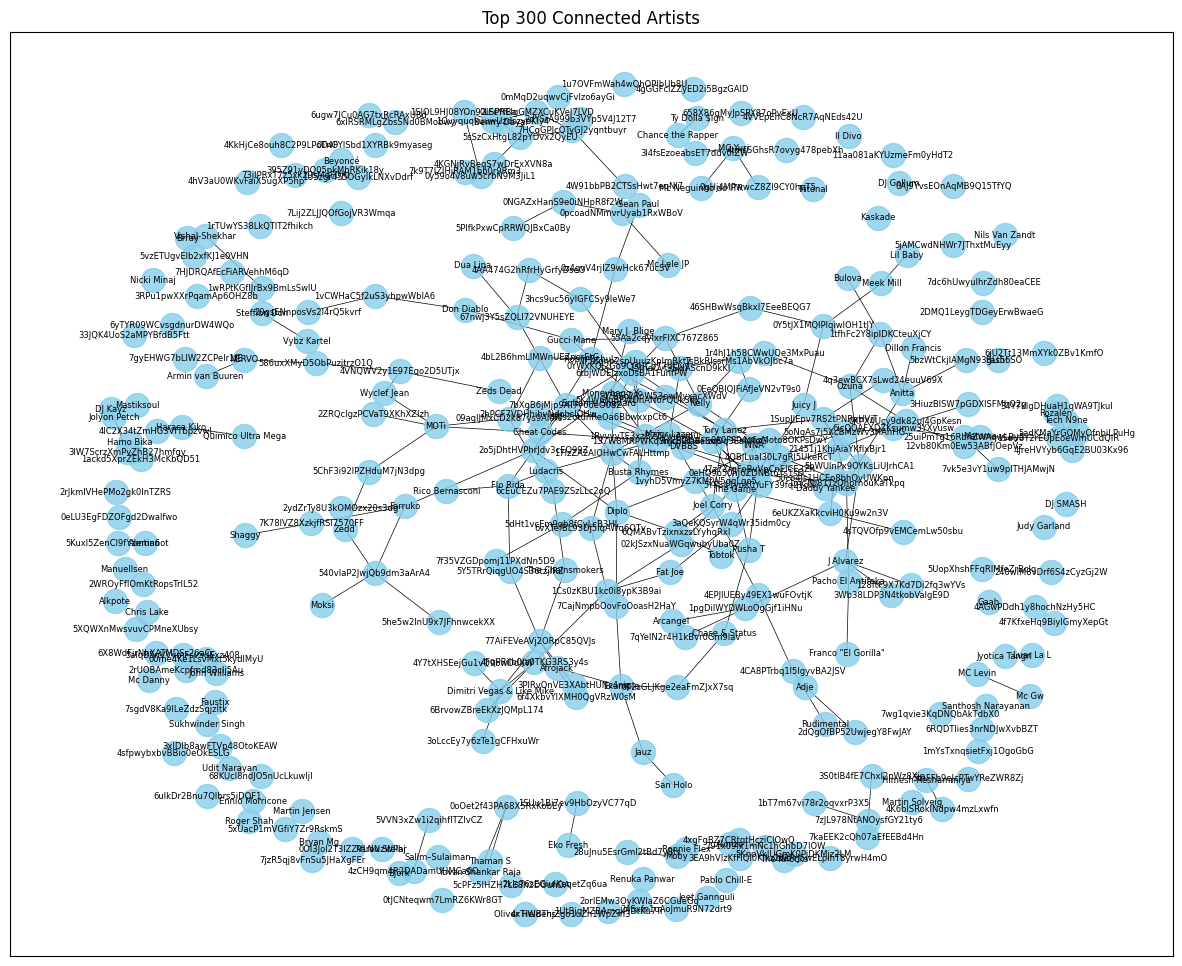

In [213]:
import matplotlib.pyplot as plt
import networkx as nx

#Display subgraph with the 250 most connected nodes
top_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:300]
H = G.subgraph([node for node, degree in top_nodes])

pos = nx.spring_layout(H, k= 0.15)

# Draw the subgraph with node names as labels
plt.figure(figsize=(15, 12))
nx.draw_networkx_nodes(H, pos, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(H, pos, edge_color='black', width=0.5)

# Use artist names as labels
labels = nx.get_node_attributes(H, 'label')
nx.draw_networkx_labels(H, pos, labels=labels, font_size=6)

plt.title("Top 300 Connected Artists")
plt.show()